# **Understanding Activation Functions in Neural Networks**
This Notebook provides a comprehensive guide on activation functions in neural networks, their significance, how they work, and how to incorporate them into your models using Keras.

## Introduction to Activation Functions
Activation functions are crucial in neural networks as they determine the output of a model, its accuracy, and computational efficiency. They introduce non-linearity into the network, enabling it to learn complex patterns in the data.

**What Are Activation Functions?**

An activation function is a mathematical operation applied to a node's input to determine its output. Without activation functions, a neural network would essentially become a linear regression model, incapable of handling complex data patterns.

**Why Are They Important?**

Activation functions allow neural networks to learn and make sense of something complicated and non-linear complex functional mappings between inputs and outputs.

## Common Activation Functions
Let's explore some commonly used activation functions and see how to implement them in Keras.

## Sigmoid Function
The sigmoid function outputs values between 0 and 1, making it a good choice for binary classification problems.

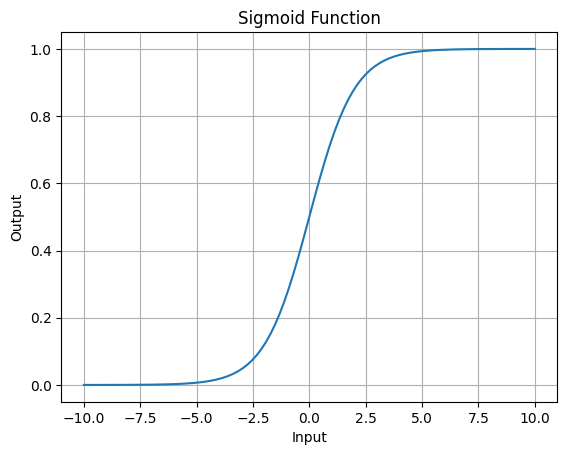

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_activation_function(func, title):
    x = np.linspace(-10, 10, 100)
    y = func(x)
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.show()

# Sigmoid function plot
plot_activation_function(tf.keras.activations.sigmoid, "Sigmoid Function")

## ReLU Function
The Rectified Linear Unit (ReLU) is the most widely used activation function in deep learning models. It outputs the input directly if it's positive; otherwise, it outputs zero.

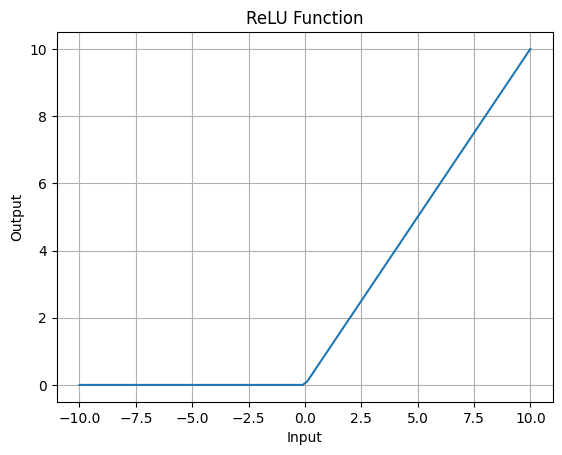

In [2]:
# ReLU function plot
plot_activation_function(tf.keras.activations.relu, "ReLU Function")

## Softmax Function
The softmax function is often used in the output layer of a classifier, converting logits to probabilities by taking the exponentials of each output and then normalizing these values.

In [3]:
# Since Softmax is generally used across multiple outputs, we'll simulate a small network output for demonstration
def softmax_demo(inputs):
    exp_values = np.exp(inputs - np.max(inputs))
    return exp_values / np.sum(exp_values)

inputs = np.array([2, 1, 0.1])
output = softmax_demo(inputs)
print("Softmax Output:", output)


Softmax Output: [0.65900114 0.24243297 0.09856589]


## Hyperbolic Tangent Function (tanh)
The hyperbolic tangent function, or tanh, outputs values between -1 and 1. This makes it well-suited for tasks where the model needs to predict between two extremes. It's similar to the sigmoid function but provides output across a broader range.

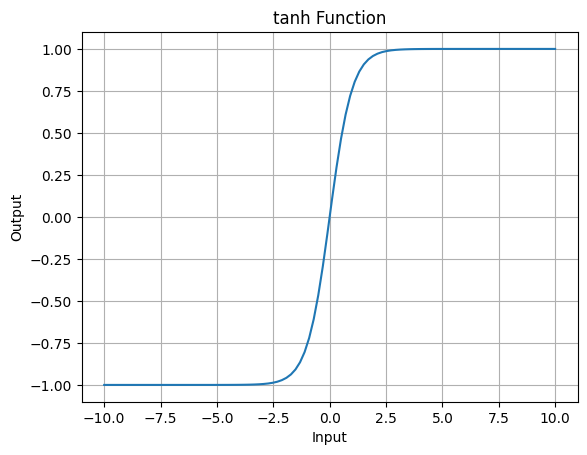

In [6]:
# tanh function plot
plot_activation_function(tf.keras.activations.tanh, "tanh Function")


## Leaky ReLU
Leaky ReLU is a variant of the ReLU function designed to allow a small, non-zero gradient when the input is negative. This modification helps to keep the neurons alive during training and can sometimes improve performance.

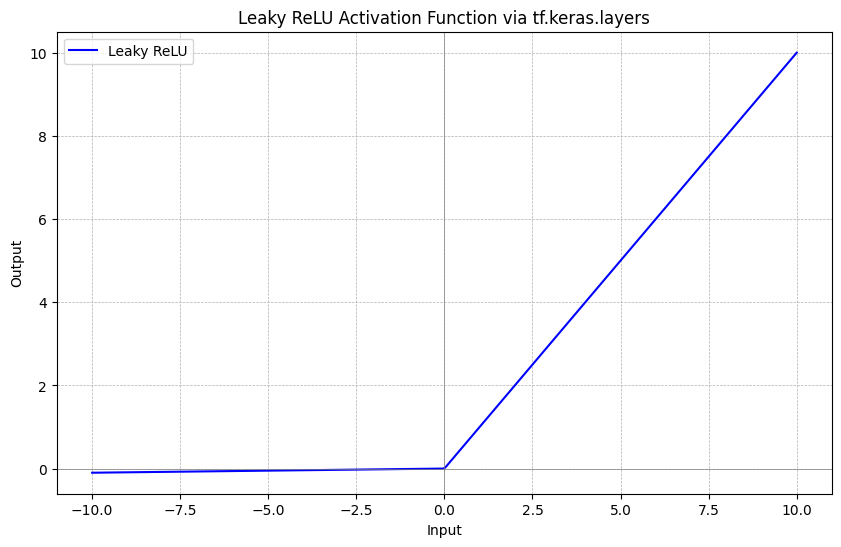

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Set up the Leaky ReLU layer
leaky_relu_layer = tf.keras.layers.LeakyReLU(alpha=0.01)

# 2. Generate input values
x_values = np.linspace(-10, 10, 400).reshape(-1, 1)  # Reshape for passing through Keras layer

# 3. Apply the Leaky ReLU layer
y_values = leaky_relu_layer(x_values)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Leaky ReLU", color="blue")
plt.title("Leaky ReLU Activation Function via tf.keras.layers")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

## Incorporating Activation Functions in Keras Models
In Keras, activation functions can be specified within layers using the activation argument, or as separate layers using tf.keras.layers.Activation.

### Specifying Activation Functions in Layers

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(5,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()


c:\Users\AlxMa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)                │         60 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 3)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

### Using Activation Functions as Separate Layers

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(5,)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Activation('softmax')
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)                │         60 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation (Activation)         │ (None, 10)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 3)                 │         33 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_1 (Activation)       │ (None, 3)                 │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

| Activation Function | Keras Name    | Usual Application                                   |
|---------------------|---------------|-----------------------------------------------------|
| Sigmoid             | 'sigmoid'     | Binary classification at the output layer           |
| ReLU                | 'relu'        | Most layers, especially in deep networks            |
| Softmax             | 'softmax'     | Multi-class classification at the output layer      |
| tanh                | 'tanh'        | Hidden layers in some cases                         |
| Leaky ReLU          | 'relu', alpha | Where dead neurons are a problem                    |
| ELU                 | 'elu'         | Alternative to ReLU, especially in deeper networks  |
| Swish               | Custom        | Can be an alternative to ReLU, in deeper networks   |
